In [1]:
from XRR import rebin
from GID import GID
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import h5py
import os

In [2]:
FileDir = '/media/egor/82ACE81CACE80D0B/ls3582/id10-surf/20251120/RAW_DATA/DPPC_0PS/DPPC_0PS_0002/'
FileName = 'DPPC_0PS_0002.h5'

SavingDir = FileDir.replace('RAW_DATA', 'PROCESSED_DATA')  ### optional. If this argument is not given to the class, data will be saved in the folder where the script runs

ScanN_list = [19]
file = FileDir+FileName

Start loading data.
Loading scan #19
Loaded scan #19
Loading completed. Reading time 0.004 sec
Start processing 2D data.
Processing completed. Processing time 0.002 sec 


Saving standard GID plot.


/home/egor/PycharmProjects/GID_ID10/GID.py:217: RuntimeWarning: divide by zero encountered in log10
  im = ax0.imshow(np.log10(np.rot90(self.data_gap)), aspect='equal', vmin=_vmin, vmax=_vmax,


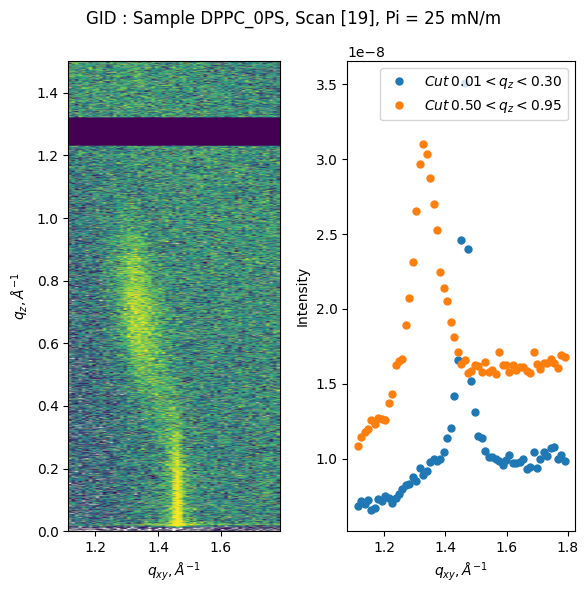

In [3]:
gid = GID(file, ScanN_list, PX0=50, PPD=198.5, mythen_gap=90, alpha_i_name='mu', I0=2e12, saving_dir=SavingDir)
gid.plot_quick_analysis(save=True)

GID cut saved as: /media/egor/82ACE81CACE80D0B/ls3582/id10-surf/20251120/PROCESSED_DATA/DPPC_0PS/DPPC_0PS_0002//GID_DPPC_0PS_scan_[19]_qxy_cut_0_0.4_A.dat
GID cut saved as: /media/egor/82ACE81CACE80D0B/ls3582/id10-surf/20251120/PROCESSED_DATA/DPPC_0PS/DPPC_0PS_0002//GID_DPPC_0PS_scan_[19]_qxy_cut_0.5_1_A.dat


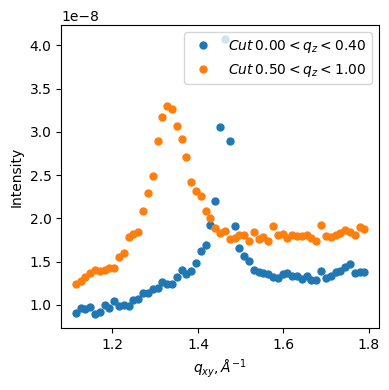

In [4]:
fig, ax = plt.subplots(1,1, figsize=(4,4), layout='tight')
gid.plot_qxy_cut(0, 0.4, ax=ax)            ## plot cut
gid.plot_qxy_cut(0.5, 1, ax=ax)

gid.save_qxy_cut(0, 0.4)                   ## save the same cut as txt file
gid.save_qxy_cut(0.5, 1)

GID cut saved as: /media/egor/82ACE81CACE80D0B/ls3582/id10-surf/20251120/PROCESSED_DATA/DPPC_0PS/DPPC_0PS_0002//GID_DPPC_0PS_scan_[19]_qz_cut_1.25_1.4_A.dat


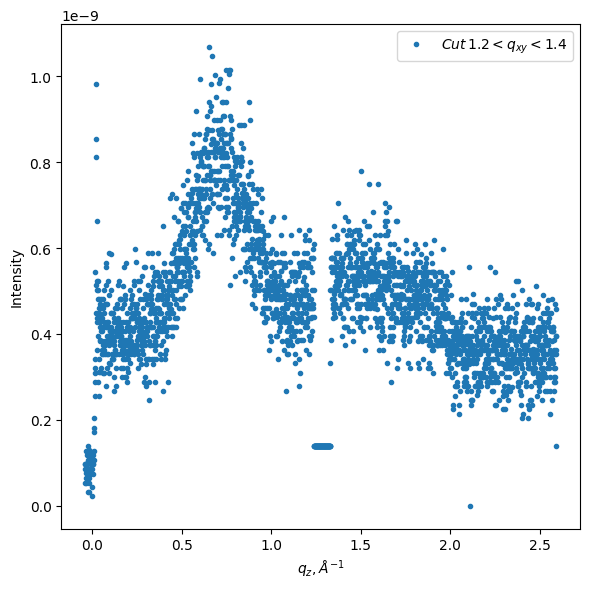

In [5]:
gid.plot_qz_cut(1.25, 1.4)
gid.save_qz_cut(1.25, 1.4)

## Plot only 2D graph to be able to modifiy image

(0.0, 1.5)

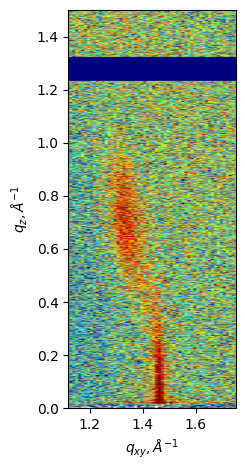

In [6]:
fig, ax = plt.subplots(layout='tight')
gid.plot_2D_image(ax=ax, cmap='jet')   ### this function takes kwargs for imshow
ax.set_xlim((1.12,1.75))
ax.set_ylim(0, 1.5)

### An example of rebinning data to smooth/reduce number of points

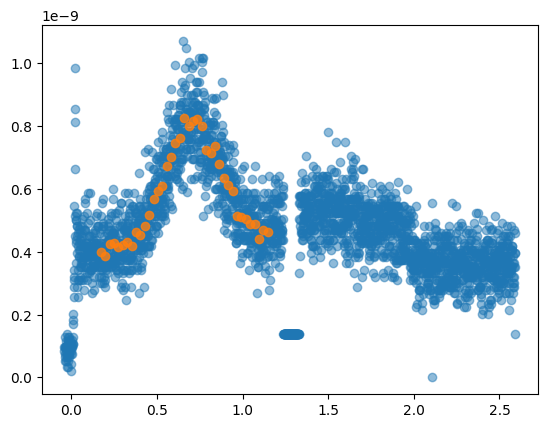

In [7]:
qz, qz_cut  = gid.get_qz_cut(1.25, 1.4)
new_qz, new_qz_cut, new_qz_e = rebin(qz[200:1200], qz_cut[200:1200],np.ones(len(qz[200:1200])), number_of_bins=40)
plt.plot(qz, qz_cut, 'o', alpha=0.5)
plt.plot(new_qz, new_qz_cut, 'o', alpha=0.8)

## Example of quick data fitting

### It is possible to modify peak shape and background
### Peak shapes:
+ Gaussian
+ Lorentzian
+ Voigt
+ Pseudo-voigt
### Backgrounds:
+ Linear
+ Constant

Fitting gaussian profile...
Graph saved to /media/egor/82ACE81CACE80D0B/ls3582/id10-surf/20251120/PROCESSED_DATA/DPPC_0PS/DPPC_0PS_0002//qz_fit_result_pi_25_DPPC_0PS.png
Fit parameters saved to /media/egor/82ACE81CACE80D0B/ls3582/id10-surf/20251120/PROCESSED_DATA/DPPC_0PS/DPPC_0PS_0002//qz_fit_result_pi_25_DPPC_0PS.txt


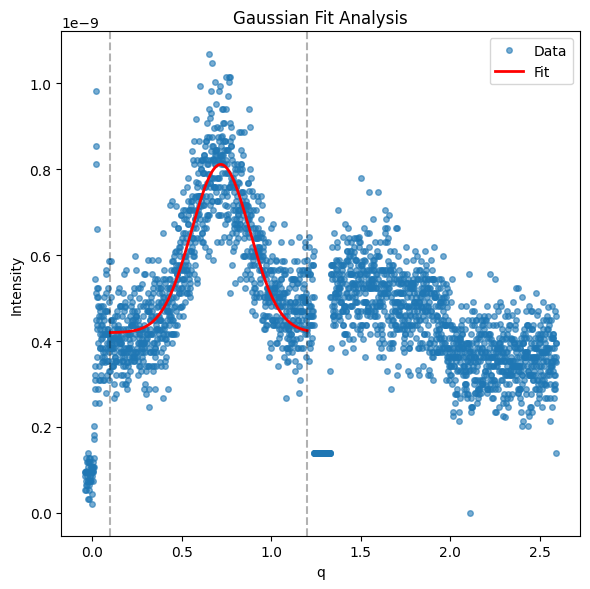

In [8]:
gid.analyze_peak(*gid.get_qz_cut(1.25, 1.4), limits=(0.1, 1.2), model='gaussian', background='constant', filename_prefix=f'qz_fit_result_pi_{gid.Pi}', save=True)

Fitting voigt profile...
Graph saved to /media/egor/82ACE81CACE80D0B/ls3582/id10-surf/20251120/PROCESSED_DATA/DPPC_0PS/DPPC_0PS_0002//qxy_fit_result_pi_25_DPPC_0PS.png
Fit parameters saved to /media/egor/82ACE81CACE80D0B/ls3582/id10-surf/20251120/PROCESSED_DATA/DPPC_0PS/DPPC_0PS_0002//qxy_fit_result_pi_25_DPPC_0PS.txt


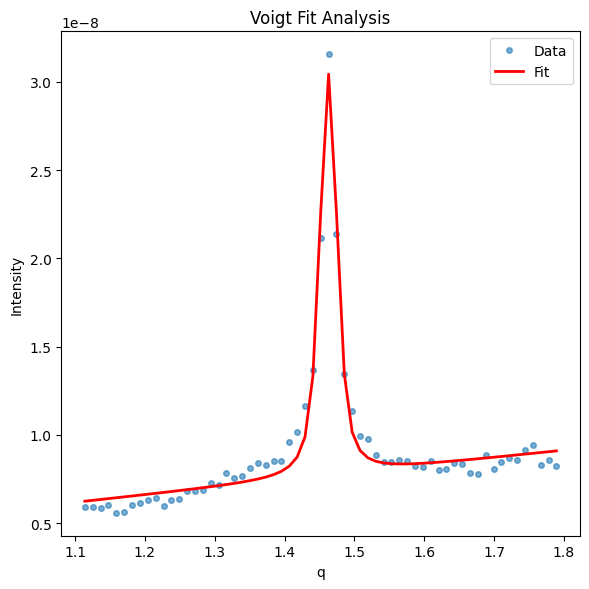

In [9]:
gid.analyze_peak(*gid.get_qxy_cut(0, 0.25), filename_prefix=f'qxy_fit_result_pi_{gid.Pi}', save=True)

## Saving a 2D image to h5 file to be explored with pyMCA

In [11]:
gid.save_image_h5()

2D image saved to /media/egor/82ACE81CACE80D0B/ls3582/id10-surf/20251120/PROCESSED_DATA/DPPC_0PS/DPPC_0PS_0002//GID_DPPC_0PS_scan_[19]_2D.h5
